In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-06 20:54:10.932375: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-06 20:54:10.970950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-06 20:54:11.531236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 


#######################################################

#     Este programa quando executado usa dados reconstruídos

#     Para refazer as previsões, tem que apagar os dados dos anos para prever na planilha

########################################################

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/André - RJ_Reconstrucao_Sparidae_2024_08_15.xlsx')
df_Marimba_ind = pd.DataFrame(df[['Ano','Marimba_ind']])

dados = df_Marimba_ind.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1986,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Marimba_ind'].values
dados.head()

,Ano,Marimba_ind
34,1984,1.0
35,1985,1.0
37,1987,1.0
38,1988,2.0
39,1989,2.0


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [11]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=68, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Marimba/pesos pesca ind/.weights.h5', overwrite=True)

Epoch 1/68


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step - loss: 1.0046
Epoch 2/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9921
Epoch 3/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9822
Epoch 4/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9739
Epoch 5/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9673
Epoch 6/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9621
Epoch 7/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9567
Epoch 8/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9496
Epoch 9/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9412
Epoch 10/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9323
Epoch 11/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9235
Epoch 12/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9149
Epoch 13/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9064
Epoch 14/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8978
Epoch 15/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8889
Epoch 16/68
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Marimba/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[1.340009  ]
 [1.4704466 ]
 [1.4991758 ]
 [1.5245935 ]
 [1.5429736 ]
 [1.5546335 ]
 [1.5613937 ]
 [1.5583826 ]
 [1.5528935 ]
 [1.5442183 ]
 [1.5487915 ]
 [1.5421    ]
 [1.4682975 ]
 [1.3037938 ]
 [1.107364  ]
 [0.89259773]
 [0.64644766]
 [0.37046623]
 [0.14919496]
 [1.5235267 ]]


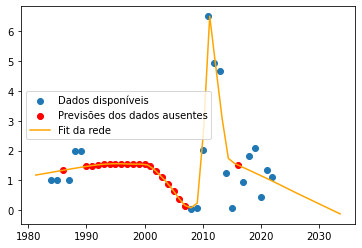

In [12]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

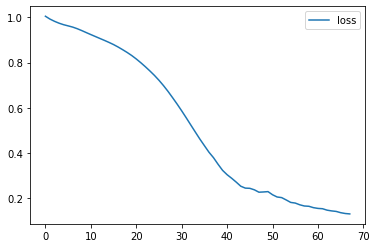

In [13]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [14]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Marimba_ind':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sparidae/Marimba/Interpolações Marimba_ind.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Ano,Marimba_ind
0,1950,0.000000
1,1951,0.000000
2,1952,0.017955
3,1953,0.058197
4,1954,0.098445
...,...,...
62,2012,5.237962
63,2013,3.627694
64,2014,2.048921
65,2015,1.615412
